In [0]:
!pip install pyspc

  Created wheel for pyspc: filename=pyspc-0.4-cp36-none-any.whl size=30878 sha256=39e801433efb21f25b7f25fe1c1911f4c9a5f2f90c6d1321ec686db28d9701ca
  Stored in directory: /root/.cache/pip/wheels/bf/03/f8/b15370eb2f37f1fbc6b921ce1460d94f81f6cb648926086991
Successfully built pyspc


In [0]:
import numpy 
from pyspc import *

In [0]:
data = pd.read_csv("honeyproduction.csv")
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [0]:
#Se toman en cuenta las columnas que tienen que ver con la cantidad de produccion y la ganancia de miel
cols = ['state','numcol','yieldpercol','stocks','priceperlb']
production= data.drop(cols, axis=1) 
production.head()

,totalprod,prodvalue,year
0,1136000.0,818000.0,1998
1,3300000.0,2112000.0,1998
2,3445000.0,2033000.0,1998
3,37350000.0,23157000.0,1998
4,1944000.0,1361000.0,1998


In [0]:
groupPerYear= production.groupby('year')
idx = 0
dataProduction=groupPerYear.agg('sum')
new_col= dataProduction.index.tolist()
dataProduction.insert(loc=idx, column='year', value=new_col)
dataProduction
 

,year,totalprod,prodvalue
year,,,
1998,1998,219519000.0,146091000.0
1999,1999,202387000.0,123657000.0
2000,2000,219558000.0,131568000.0
2001,2001,185748000.0,132282000.0
2002,2002,171265000.0,227302000.0
2003,2003,181372000.0,252079000.0
2004,2004,182729000.0,197307000.0
2005,2005,173969000.0,160793000.0
2006,2006,154238000.0,157924000.0


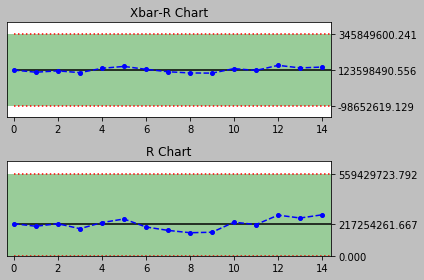

<pyspc: (-9223363285799202423)>


In [0]:
a=spc(dataProduction)+xbar_rbar()+rbar()+rules()
print(a)

In [0]:
#El objetivo vendria a ser el promedio de los precios del valor de la produccion
dataTarget = data['prodvalue']
target = dataTarget.agg('mean')
target

196803600.0

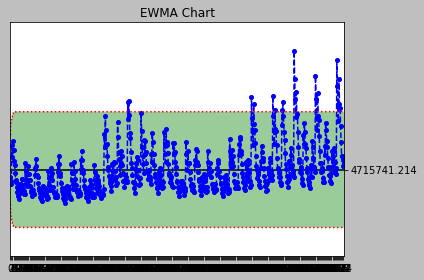

<pyspc: (8751055289103)>


In [0]:
#se observa el comportamiento de los valores de la produccion 
a = spc(data['prodvalue'])+ewma()
print(a)